In [1]:
import matplotlib.pyplot as plt

In [3]:
from common_functions import *

In [5]:
X, y, Xv, yv = load_mini_speech_commands()
def slog(x):
    return np.log(1+np.abs(x))*np.sign(x)
def ulog(x):
    return np.log(1+np.abs(x))
# X = ulog(X)
# Xv = ulog(Xv)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


In [27]:
norm_layer =layers.Normalization()
norm_layer.adapt(data=X)

model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_1 (Normalizat  (None, 32, 32, 128)      257       
 ion)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

2022-12-05 08:09:34.832781: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


50/50 [==============================] - 0s 4ms/step - loss: 1.4826 - accuracy: 0.6319


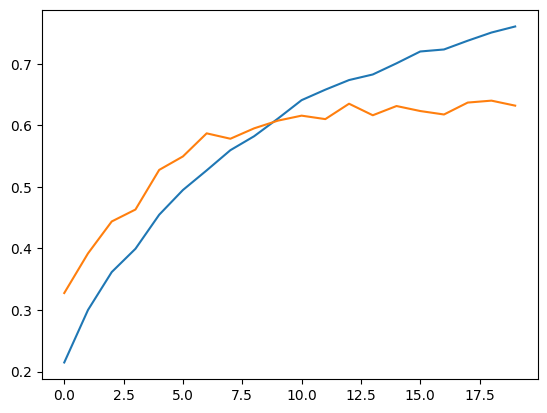

In [ ]:
train_acc = [];
test_acc = [];
for i_iter in range(20):
    train_history = model.fit(x=X, y=y, epochs=1, batch_size=128);
    _, test_acc_i = model.evaluate(x=Xv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
train_acc = np.vstack(train_acc)
test_acc = np.vstack(test_acc)
plt.plot(train_acc)
plt.plot(test_acc)